<a href="https://colab.research.google.com/github/hallosayaimroatubelajargithub/UTS-Text-Mining-0002/blob/main/2uts_textminning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2. Lakukan Analisa Sentimen Objek**
---





In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "https://raw.githubusercontent.com/hallosayaimroatubelajargithub/UTS-Text-Mining-0002/main/hasil_review.csv?token=GHSAT0AAAAAABZQX6ERZETXOEVKENREFCA4Y3F6JYQ"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,index,place,name,rating,review
0,0,Kota Lama Semarang,Gede Bagus Bayu Pentium,5.0,It is a rising popular place in Semarang for b...
1,1,Kota Lama Semarang,Rui Wang,4.0,Free public spaces to stroll around with a chi...
2,2,Kota Lama Semarang,wiwin.m winreds,4.0,A unique and historical place and one of the i...
3,3,Kota Lama Semarang,Akma Ikasari,5.0,5 stars for the place. 3 stars for the experie...
4,4,Kota Lama Semarang,dian ratnasari,5.0,Finally I can go to Semarangâs Old City!Even...
...,...,...,...,...,...
245,245,Es Teh Indonesia Kota Lama Semarang,OWASA OkyWahyuSaputro,5.0,"(Translated by Google) The place is honest, it..."
246,246,Es Teh Indonesia Kota Lama Semarang,Wahyu Santoso,5.0,(Translated by Google) The drinks are really f...
247,247,Es Teh Indonesia Kota Lama Semarang,Monalisa Aprilia Puspitasari,5.0,(Translated by Google) A very comfortable plac...
248,248,Es Teh Indonesia Kota Lama Semarang,Vici kristian Marunduri,5.0,(Translated by Google) So delicious ð #este...


In [ ]:
df.drop(columns = ['index','place','name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,5.0,It is a rising popular place in Semarang for b...
1,4.0,Free public spaces to stroll around with a chi...
2,4.0,A unique and historical place and one of the i...
3,5.0,5 stars for the place. 3 stars for the experie...
4,5.0,Finally I can go to Semarangâs Old City!Even...


**Preprocessing Data**
---



- **Cleaning The Text**



In [ ]:
import string
import re

In [ ]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_Review'] = df['Review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

- **Adding additional features - length of, and percentage of punctuations in the text**

In [ ]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['Review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_Review,label,Review_len,punct
0,5.0,It is a rising popular place in Semarang for b...,it is a rising popular place in semarang for b...,1,561,2.7
1,4.0,Free public spaces to stroll around with a chi...,free public spaces to stroll around with a chi...,1,302,1.0
2,4.0,A unique and historical place and one of the i...,a unique and historical place and one of the i...,1,188,1.6
3,5.0,5 stars for the place. 3 stars for the experie...,stars for the place stars for the experie...,1,334,3.9
4,5.0,Finally I can go to Semarangâs Old City!Even...,finally i can go to semarang s old city even...,1,199,4.0
...,...,...,...,...,...,...
245,5.0,"(Translated by Google) The place is honest, it...",translated by google the place is honest it...,1,419,5.3
246,5.0,(Translated by Google) The drinks are really f...,translated by google the drinks are really f...,1,339,7.7
247,5.0,(Translated by Google) A very comfortable plac...,translated by google a very comfortable plac...,1,267,2.6
248,5.0,(Translated by Google) So delicious ð #este...,translated by google so delicious este...,1,133,6.0


- **Tokenization**

In [ ]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_Review'].apply(lambda x: tokenize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens
0,5.0,It is a rising popular place in Semarang for b...,it is a rising popular place in semarang for b...,1,561,2.7,"[it, is, a, rising, popular, place, in, semara..."
1,4.0,Free public spaces to stroll around with a chi...,free public spaces to stroll around with a chi...,1,302,1.0,"[free, public, spaces, to, stroll, around, wit..."
2,4.0,A unique and historical place and one of the i...,a unique and historical place and one of the i...,1,188,1.6,"[a, unique, and, historical, place, and, one, ..."
3,5.0,5 stars for the place. 3 stars for the experie...,stars for the place stars for the experie...,1,334,3.9,"[stars, for, the, place, stars, for, the, expe..."
4,5.0,Finally I can go to Semarangâs Old City!Even...,finally i can go to semarang s old city even...,1,199,4.0,"[finally, i, can, go, to, semarang, s, old, ci..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_Review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens,lemmatized_Review
0,5.0,It is a rising popular place in Semarang for b...,it is a rising popular place in semarang for b...,1,561,2.7,"[it, is, a, rising, popular, place, in, semara...",rising popular place semarang local tourist co...
1,4.0,Free public spaces to stroll around with a chi...,free public spaces to stroll around with a chi...,1,302,1.0,"[free, public, spaces, to, stroll, around, wit...",free public space stroll around chic old town ...
2,4.0,A unique and historical place and one of the i...,a unique and historical place and one of the i...,1,188,1.6,"[a, unique, and, historical, place, and, one, ...",unique historical place one iconic semarang to...
3,5.0,5 stars for the place. 3 stars for the experie...,stars for the place stars for the experie...,1,334,3.9,"[stars, for, the, place, stars, for, the, expe...",star place star experience day cause weather c...
4,5.0,Finally I can go to Semarangâs Old City!Even...,finally i can go to semarang s old city even...,1,199,4.0,"[finally, i, can, go, to, semarang, s, old, ci...",finally go semarang old city even tho still mo...


**3. Lakukan Exploratory Data Analysis**
---



In [ ]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['Rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['Rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['Rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['Rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['Rating']==5.0]) } rows")

Input data has 250 rows and 8 columns
Rating 1.0 = 3 rows
Rating 2.0 = 0 rows
Rating 3.0 = 8 rows
Rating 4.0 = 41 rows
Rating 5.0 = 198 rows


Number of null in label: 0
Number of null in text: 0


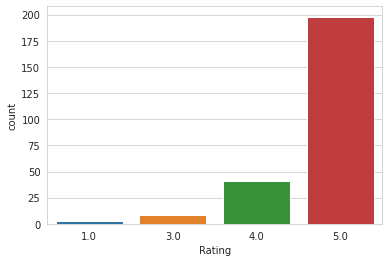

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

- **Visualizing Word Clouds**

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0) ]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_Review'].tolist()
positive_list=df_positive['lemmatized_Review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()


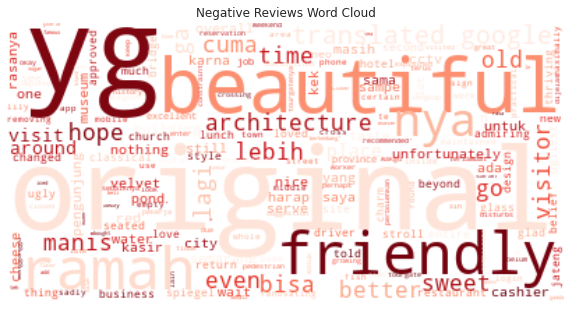

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

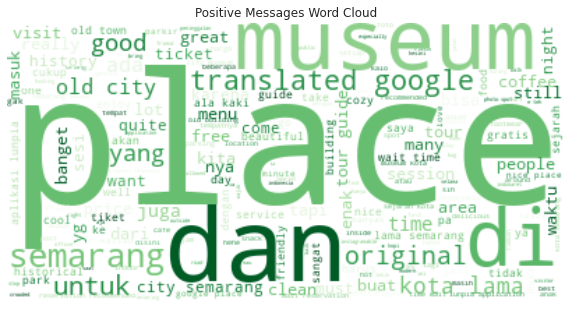

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

- **Feature Extraction from Text**

In [ ]:
X = df[['lemmatized_Review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(250, 3)
(250,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 3)
(75, 3)
(175,)
(75,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_Review'])
tfidf_test = tfidf.transform(X_test['lemmatized_Review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821
0,76,3.9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.279266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

**4. Lakukan klasifikasi**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

- **Menggunakan Algoritma Multinomia Naive Bayes**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



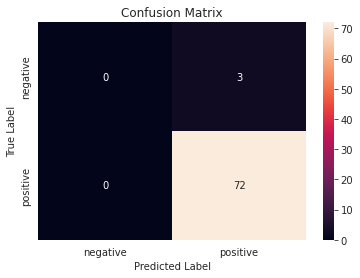

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- **Menggunakan Algoritma Random Forest Classiefier**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



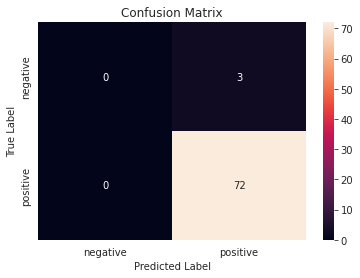

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- **Menggunakan Algoritma Logistic Regression**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



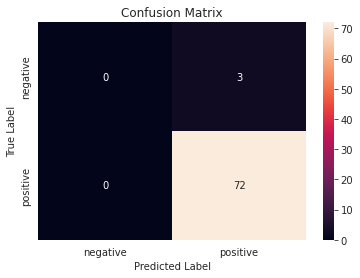

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- **Menggunakan Algoritma Support Vector Machine**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



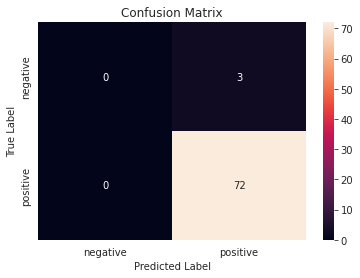

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- **Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



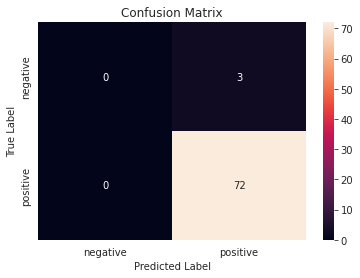

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- **Menggunakan algoritma Extra Tress Classifier**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



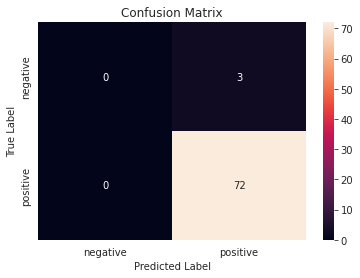

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**5. Lakukan pengukuran kinerja algoritma klasifikasi**

- **K=10**

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.9545751633986927 
 precision - 0.9545751633986927 
 recall - 1.0 
 f1 - 0.9766233766233764 

Logistic Regression
 accuracy - 0.9545751633986927 
 precision - 0.9545751633986927 
 recall - 1.0 
 f1 - 0.9766233766233764 

Random Forest
 accuracy - 0.9545751633986927 
 precision - 0.9545751633986927 
 recall - 1.0 
 f1 - 0.9766233766233764 

SVM
 accuracy - 0.9545751633986927 
 precision - 0.9545751633986927 
 recall - 1.0 
 f1 - 0.9766233766233764 

KNN
 accuracy - 0.9545751633986927 
 precision - 0.9545751633986927 
 recall - 1.0 
 f1 - 0.9766233766233764 

Extra Trees
 accuracy - 0.9486928104575163 
 precision - 0.9545751633986927 
 recall - 0.9941176470588236 
 f1 - 0.9735930735930737 



- **prediction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_Review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8

In [ ]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 1 0 1]
